# 《合成孔径雷达成像——算法与实现》中3.2.3 线性调频脉冲的采样

## 图3.4 过采样率在频谱中引起的能量间隙


对不同过采样率，探索对信号频谱的影响。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体 
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题 

In [2]:
T = 10e-6;                     # % 信号持续时间
B = 10e6;                      # % 信号带宽
K = B/T;                       # % 调频率
ratio = [1.4,1.2,1.0,0.8];
Num = len(ratio);


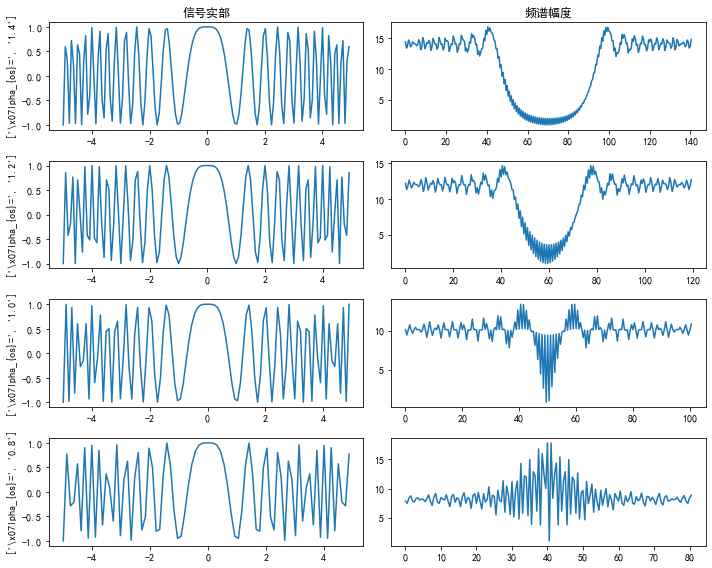

In [3]:
plt.figure(figsize=(10,8))
for ii in range(Num):
    Fs = ratio[ii]*B;     #      % 采样频率
    dt = 1/Fs;              #    % 采样间隔
    N = int(np.ceil(T/dt));         #    % 采样点数
    r = np.arange(N)
    t = (r-N/2)/N*T;     # % 时间轴
    f = (r-N/2)/N*Fs;

    st0 = np.exp(1j*np.pi*K*t**2);  #  % 生成信号
    z = np.zeros(N)
    st1 = np.concatenate((st0,z),dtype=complex,axis=None)    # % 补零后的信号，补1倍
    Sf = np.fft.fft(st1);

    n = np.arange(2*N)/2

    plt.subplot(Num,2,2*ii+1)
    plt.plot(t*1e6,np.real(st0))#;axis tight
    plt.ylabel(['\alpha_{os}=',str(ratio[ii])]);
    if(ii == 0):
        plt.title('信号实部');
    if(ii == Num):
        plt.xlabel('时间(\mus)');
    plt.subplot(Num,2,2*ii+2)
    plt.plot(n,np.abs(Sf))#;axis tight
    if(ii ==0):
        plt.title('频谱幅度');
    if(ii == Num):
        plt.xlabel('频率（单元）');
    plt.tight_layout()

本文Python代码参照Matlab代码自 https://blog.csdn.net/Destiny0321/article/details/53096327

2048


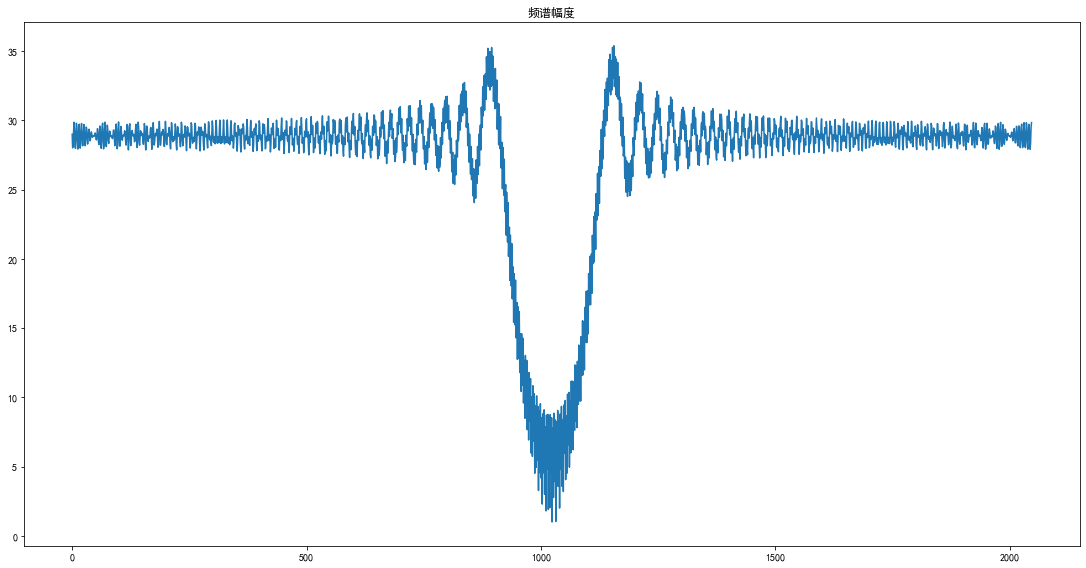

In [12]:
T = 42e-6;               # % 信号持续时间
K = 0.41e12              # % 调频率
B = K*T;                 # % 信号带宽

ratio = 1.05;                # % 过采样率
Fs = ratio*B;              # % 采样频率
# print(Fs)
dt = 1/Fs;                 # % 采样间隔
plt.figure(figsize=(30,8))
ratio = [1.05];
Num = len(ratio);
for ii in range(Num):
    Fs = ratio[ii]*B;     #      % 采样频率
    dt = 1/Fs;              #    % 采样间隔
    N = 2048;         #    % 采样点数
    Nr = 777  #    % 采样点数
    print(N)
    r = np.arange(Nr)
    t = (r-Nr/2)/Nr*T;     # % 时间轴

    st0 = np.exp(1j*np.pi*K*t**2);  #  % 生成信号
    z = np.zeros(N-Nr)
    st1 = np.concatenate((st0,z),dtype=complex,axis=None)    # % 补零后的信号，补1倍
    Sf = np.fft.fft(st1);

    n = np.arange(N)

    plt.subplot(Num,2,2*ii+2)
    plt.plot(n,np.abs(Sf))#;axis tight
    if(ii ==0):
        plt.title('频谱幅度');
    if(ii == Num):
        plt.xlabel('频率（单元）');
    plt.tight_layout()